**Image Classification using Cifar-10**

The CIFAR-10 dataset consists of 6000 images per class in 10 classes totaling 60000 32x32 colour images. 10000 test photos and 50,000 training images are available.

We are going to create a CNN model that will categorise pictures of different objects. We have photos in the 10 classes:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

**Importing dataset and libraries**

In [5]:
#Importing data and visaulisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Importing deep learning libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Importing ML libraries
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

**Loading the data**

In [6]:
#Loading data from cifar10 dataset of keras
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [7]:
#Checking the shape of the dataset
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


**Visualising the dataset**

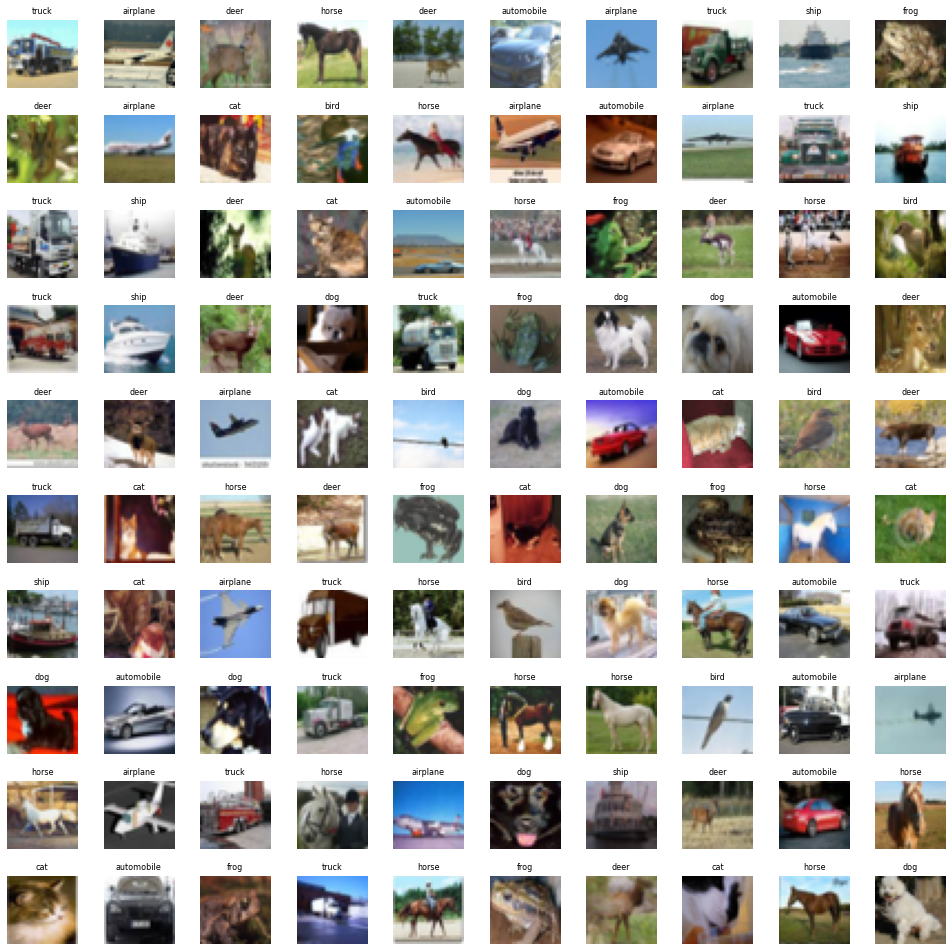

In [8]:
# Labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

#Plotting the images in a grid
Width = 10
Length= 10

fig, axes = plt.subplots(Length, Width, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) 

# Select a random number from 0 to n_train
for i in np.arange(0, Width * Length): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

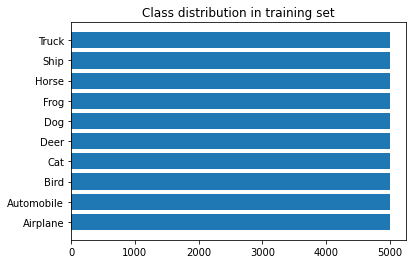

In [9]:
#To find class distribution of images in the training dataset
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

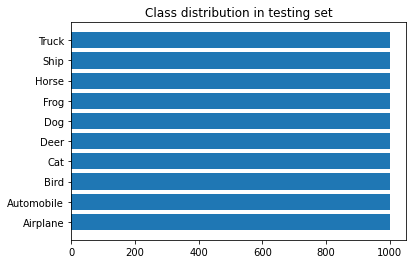

In [10]:
#To find class distribution of images in the testing dataset
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

**Images are equally distributed among classes**

**Data Preprocessing**

We need to change the image's pixel values from their current range of 1-256 to a range between 0 and 1. This makes it simple for our model to track trends and facilitates effective training. Simply dividing all pixel values by 255.0 will accomplish this.

In [11]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [12]:
#Transformed categorical trainset
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

**Defining the model using CNN**

In [13]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                      

**Parameter tuning**

In [15]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [16]:
#Time-based learning rate scheduling
initial_learning_rate = 0.01
epochs=70
decay = initial_learning_rate / epochs
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

r = model.fit(train_generator, 
              epochs=70,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
              callbacks=[LearningRateScheduler(lr_time_based_decay, verbose=1)]
             )


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/70
1562/1562 [==============================] - 46s 24ms/step - loss: 1.6443 - accuracy: 0.4050 - precision: 0.6218 - recall: 0.1911 - val_loss: 1.2858 - val_accuracy: 0.5491 - val_precision: 0.7229 - val_recall: 0.3853 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009998572107530578.
Epoch 2/70
1562/1562 [==============================] - 37s 24ms/step - loss: 1.2435 - accuracy: 0.5600 - precision: 0.7234 - recall: 0.3918 - val_loss: 1.3784 - val_accuracy: 0.5046 - val_precision: 0.6796 - val_recall: 0.3659 - lr: 9.9986e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0009995716140078531.
Epoch 3/70
1562/1562 [==============================] - 35s 23ms/step - loss: 1.0405 - accuracy: 0.6388 - precision: 0.7738 - recall: 0.5068 - val_loss: 1.0584 - val_accuracy: 0.6499 - val_precision: 0.7678 - val_recall: 0.5381 - lr: 9.9957e-04

Epoch 4: LearningRateSchedul

**Performance evaluation**

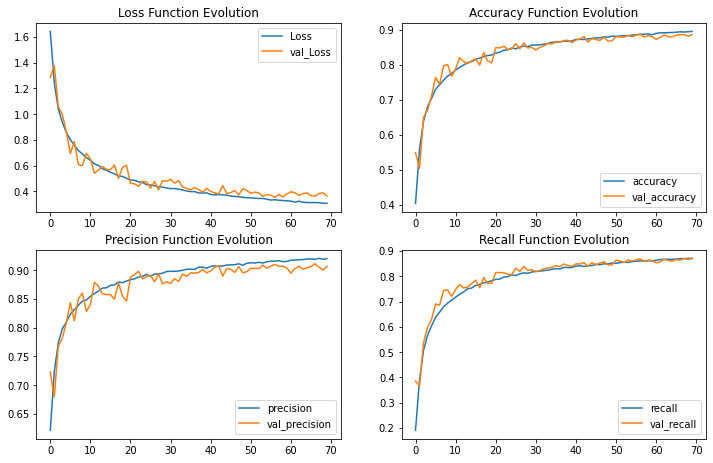

In [17]:
#Visualising the loss function trend and the accuracy function trend with number of epoch rounds
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [18]:
#Calculating the accuracy of the model
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 0.3630 - accuracy: 0.8854 - precision: 0.9068 - recall: 0.8698
Test Accuracy : 88.54%


In [19]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


**The custom CNN Model has 88.54% accuracy**

In [20]:
#Presicion, recall and f1 score in the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1000
           1       0.92      0.96      0.94      1000
           2       0.86      0.82      0.84      1000
           3       0.86      0.69      0.76      1000
           4       0.90      0.88      0.89      1000
           5       0.87      0.82      0.84      1000
           6       0.80      0.96      0.87      1000
           7       0.90      0.94      0.92      1000
           8       0.94      0.94      0.94      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



**Model Prediction Results**

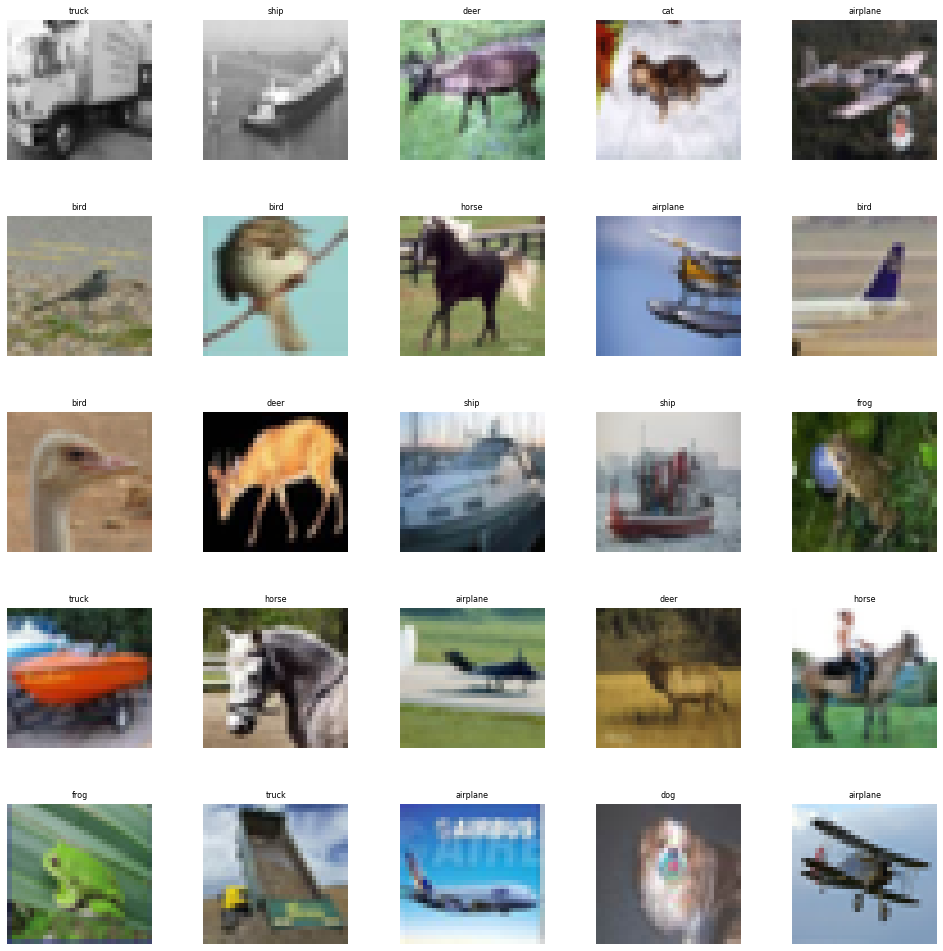

In [21]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

Width = 5
Length = 5

fig, axes = plt.subplots(Length, Width, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, Width * Length): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [22]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


**Plot the first X test images, their predicted labels, and the true labels.
 Color correct predictions in blue and incorrect predictions in red.**

In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

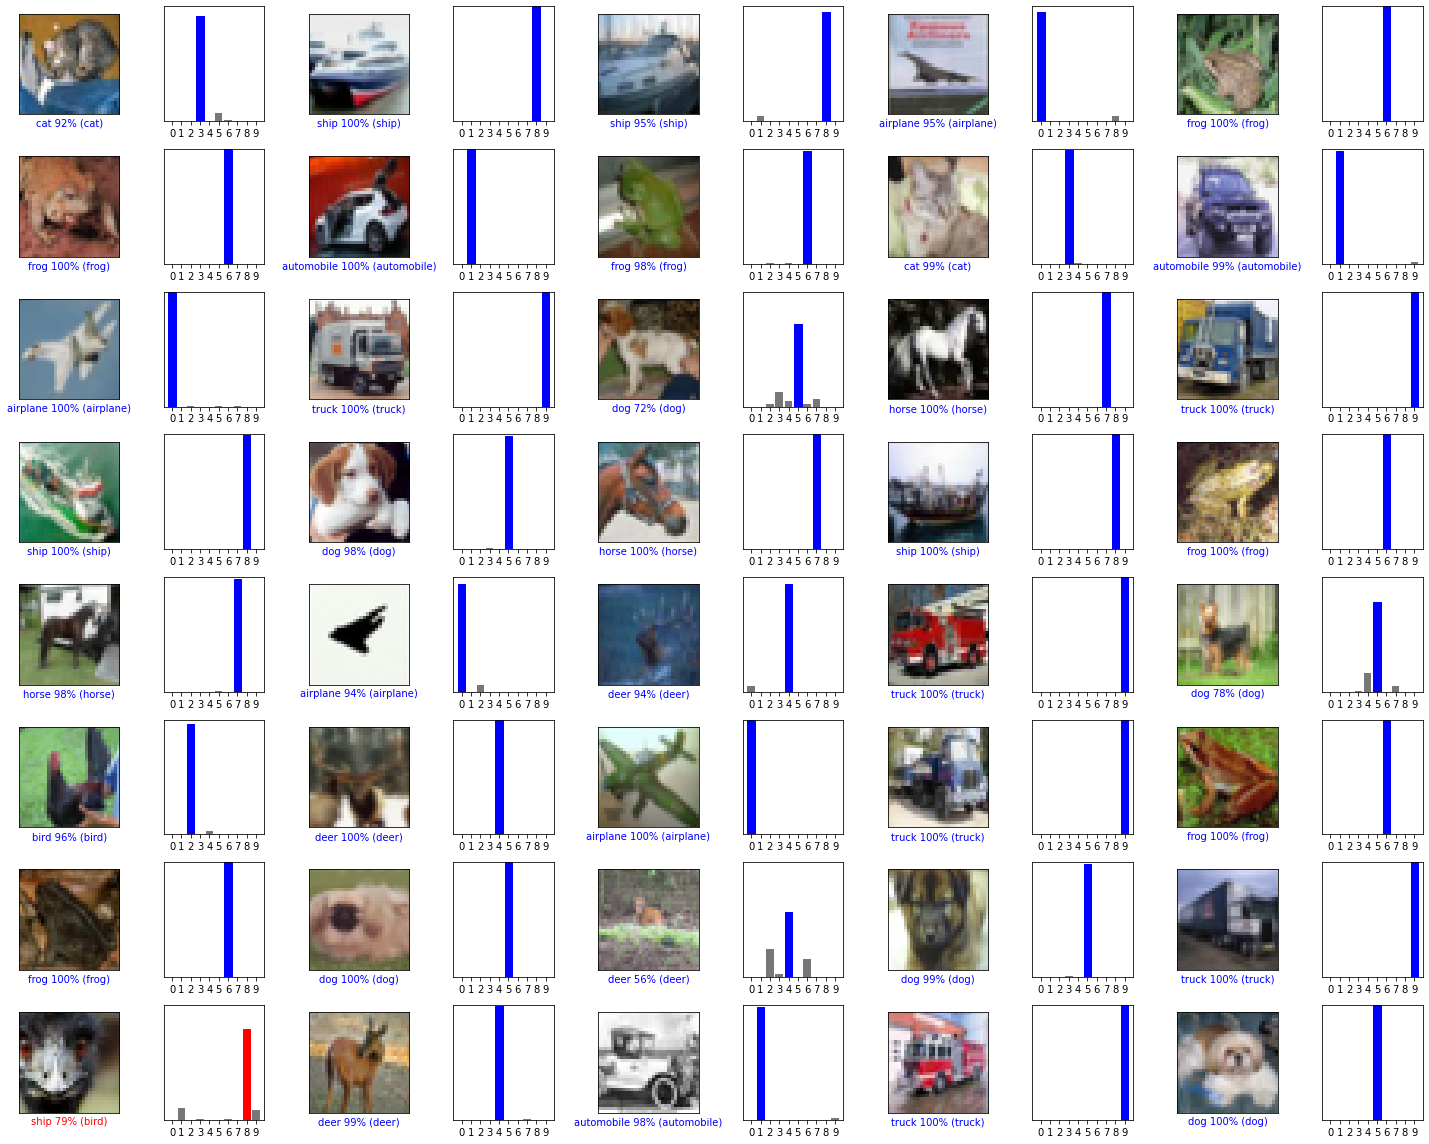

In [24]:
#Visalising predictions
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

**Comparing with Keras DenseNet pre-built model for image classification**

In [25]:
#Using DenseNet model with same paramenters

from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

r = model.fit(train_generator, 
              epochs=70,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
             )

Epoch 1/70
1562/1562 [==============================] - 116s 67ms/step - loss: 1.3660 - accuracy: 0.5388 - val_loss: 1.3288 - val_accuracy: 0.5471
Epoch 2/70
1562/1562 [==============================] - 99s 63ms/step - loss: 1.0292 - accuracy: 0.6534 - val_loss: 1.0495 - val_accuracy: 0.6314
Epoch 3/70
1562/1562 [==============================] - 99s 64ms/step - loss: 0.8630 - accuracy: 0.7081 - val_loss: 1.0737 - val_accuracy: 0.6493
Epoch 4/70
1562/1562 [==============================] - 99s 64ms/step - loss: 0.8060 - accuracy: 0.7300 - val_loss: 1.3037 - val_accuracy: 0.6335
Epoch 5/70
1562/1562 [==============================] - 101s 65ms/step - loss: 0.8371 - accuracy: 0.7199 - val_loss: 0.7672 - val_accuracy: 0.7433
Epoch 6/70
1562/1562 [==============================] - 98s 63ms/step - loss: 0.9027 - accuracy: 0.7027 - val_loss: 9.6454 - val_accuracy: 0.1025
Epoch 7/70
1562/1562 [==============================] - 97s 62ms/step - loss: 0.8843 - accuracy: 0.6981 - val_loss: 3.5905

**Performance Evaluation**

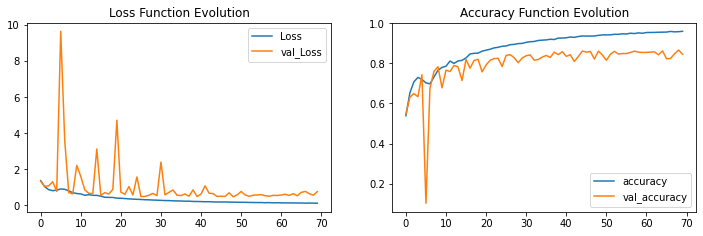

In [26]:
#Visaulising loss function trend and accuracy function trend with number of epoch rounds
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()



In [27]:
#Calculating accuracy of the model
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 4s 14ms/step - loss: 0.7576 - accuracy: 0.8453
Test Accuracy : 84.53%


**The DenseNet model has 84.53% accuracy, lesser than the custom CNN model.**